<a href="https://githubtocolab.com/giswqs/geemap/blob/master/examples/notebooks/us_census_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab"/></a>

Uncomment the following line to install [geemap](https://geemap.org) if needed.

# U.S. Census Data 

The United States Census Bureau Topologically Integrated Geographic Encoding and Referencing (TIGER) dataset contains the 2018 boundaries for the primary governmental divisions of the United States. In addition to the fifty states, the Census Bureau treats the District of Columbia, Puerto Rico, and each of the island areas (American Samoa, the Commonwealth of the Northern Mariana Islands, Guam, and the U.S. Virgin Islands) as the statistical equivalents of States for the purpose of data presentation. Each feature represents a state or state equivalent.

For full technical details on all TIGER 2018 products, see the [TIGER technical documentation](https://www2.census.gov/geo/pdfs/maps-data/data/tiger/tgrshp2018/TGRSHP2018_TechDoc.pdf).

* [TIGER: US Census States](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_States): `ee.FeatureCollection("TIGER/2018/States")`
* [TIGER: US Census Counties](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_Counties): `ee.FeatureCollection("TIGER/2018/Counties")`
* [TIGER: US Census Tracts](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Tracts_DP1): `ee.FeatureCollection("TIGER/2010/Tracts_DP1")`
* [TIGER: US Census Blocks](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Blocks): `ee.FeatureCollection("TIGER/2010/Blocks")`
* [TIGER: US Census Roads](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2016_Roads): `ee.FeatureCollection("TIGER/2016/Roads")`
* [TIGER: US Census 5-digit ZIP Code](https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_ZCTA5): `ee.FeatureCollection("TIGER/2010/ZCTA5")`

## Install Earth Engine API and geemap
Install the [Earth Engine Python API](https://developers.google.com/earth-engine/python_install) and [geemap](https://github.com/giswqs/geemap). The **geemap** Python package is built upon the [ipyleaflet](https://github.com/jupyter-widgets/ipyleaflet) and [folium](https://github.com/python-visualization/folium) packages and implements several methods for interacting with Earth Engine data layers, such as `Map.addLayer()`, `Map.setCenter()`, and `Map.centerObject()`.
The following script checks if the geemap package has been installed. If not, it will install geemap, which automatically installs its [dependencies](https://github.com/giswqs/geemap#dependencies), including earthengine-api, folium, and ipyleaflet.

In [1]:
# Installs geemap package
import subprocess

try:
    import geemap
except ImportError:
    print('geemap package not installed. Installing ...')
    subprocess.check_call(["python", '-m', 'pip', 'install', 'geemap'])

In [2]:
import ee
import geemap

## TIGER: US Census States

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_States

![](https://i.imgur.com/DAESBK4.png)

### Displaying data

In [3]:
Map = geemap.Map(center=[40, -100], zoom=4)

states = ee.FeatureCollection('TIGER/2018/States')

Map.centerObject(states, 4)
Map.addLayer(states, {}, 'US States')

Map.addLayerControl()  #This line is not needed for ipyleaflet-based Map
Map

Map(center=[45.14685155912081, -104.21966841664756], controls=(WidgetControl(options=['position'], widget=HBox…

### Dispalying vector as raster

In [7]:
Map = geemap.Map(center=[40, -100], zoom=4)

states = ee.FeatureCollection('TIGER/2018/States')
image = ee.Image().paint(states, 0, 2)

Map.centerObject(states, 4)
Map.addLayer(image, {}, 'US States')

Map.addLayerControl()
Map

Map(center=[45.14685155912081, -104.21966841664756], controls=(WidgetControl(options=['position'], widget=HBox…

### Select by attribute

#### Select one single state

In [9]:
Map = geemap.Map(center=[40, -100], zoom=4)

tn = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.eq("NAME", 'Tennessee')) 

Map.centerObject(tn, 6)
Map.addLayer(tn, {}, 'Tennessee')

Map.addLayerControl()
Map

Map(center=[35.8579904338385, -86.35074162079951], controls=(WidgetControl(options=['position'], widget=HBox(c…

In [10]:
tn = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.eq("NAME", 'Tennessee')) \
    .first()

props = tn.toDictionary().getInfo()
print(props)

{'ALAND': 106802728188, 'AWATER': 2350123465, 'DIVISION': '6', 'FUNCSTAT': 'A', 'GEOID': '47', 'INTPTLAT': '+35.8608030', 'INTPTLON': '-086.3499896', 'LSAD': '00', 'MTFCC': 'G4000', 'NAME': 'Tennessee', 'REGION': '3', 'STATEFP': '47', 'STATENS': '01325873', 'STUSPS': 'TN'}


#### Select multiple states

In [11]:
Map = geemap.Map(center=[40, -100], zoom=4)

selected = ee.FeatureCollection('TIGER/2018/States') \
    .filter(ee.Filter.inList("NAME", ['Tennessee', 'Alabama', 'Georgia']))

Map.centerObject(selected, 6)
Map.addLayer(selected, {}, 'Selected states')

Map.addLayerControl()
Map

Map(center=[33.56045133541526, -85.3765438704669], controls=(WidgetControl(options=['position'], widget=HBox(c…

#### Printing all values of a column

In [12]:
states = ee.FeatureCollection('TIGER/2018/States').sort('ALAND', False)
names = states.aggregate_array("STUSPS").getInfo()
print(names)

['AK', 'TX', 'CA', 'MT', 'NM', 'AZ', 'NV', 'CO', 'WY', 'OR', 'ID', 'UT', 'KS', 'MN', 'NE', 'SD', 'ND', 'MO', 'OK', 'WA', 'GA', 'MI', 'IA', 'IL', 'WI', 'FL', 'AR', 'AL', 'NC', 'NY', 'MS', 'PA', 'LA', 'TN', 'OH', 'KY', 'VA', 'IN', 'ME', 'SC', 'WV', 'MD', 'VT', 'NH', 'MA', 'NJ', 'HI', 'CT', 'PR', 'DE', 'RI', 'GU', 'MP', 'VI', 'AS', 'DC']


In [13]:
areas = states.aggregate_array("ALAND").getInfo()
print(areas)

[1478839695958, 676653171537, 403503931312, 376962738765, 314196306401, 294198551143, 284329506470, 268422891711, 251458544898, 248606993270, 214049787659, 212886221680, 211755344060, 206228939448, 198956658395, 196346981786, 178707534813, 178050802184, 177662925723, 172112588220, 149482048342, 146600952990, 144661267977, 143780567633, 140290039723, 138949136250, 134768872727, 131174048583, 125923656064, 122049149763, 121533519481, 115884442321, 111897594374, 106802728188, 105828882568, 102279490672, 102257717110, 92789302676, 79887426037, 77864918488, 62266474513, 25151100280, 23874175944, 23189413166, 20205125364, 19047825980, 16633990195, 12542497068, 8868896030, 5045925646, 2677779902, 543555840, 472292529, 348021896, 197759063, 158340391]


In [14]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


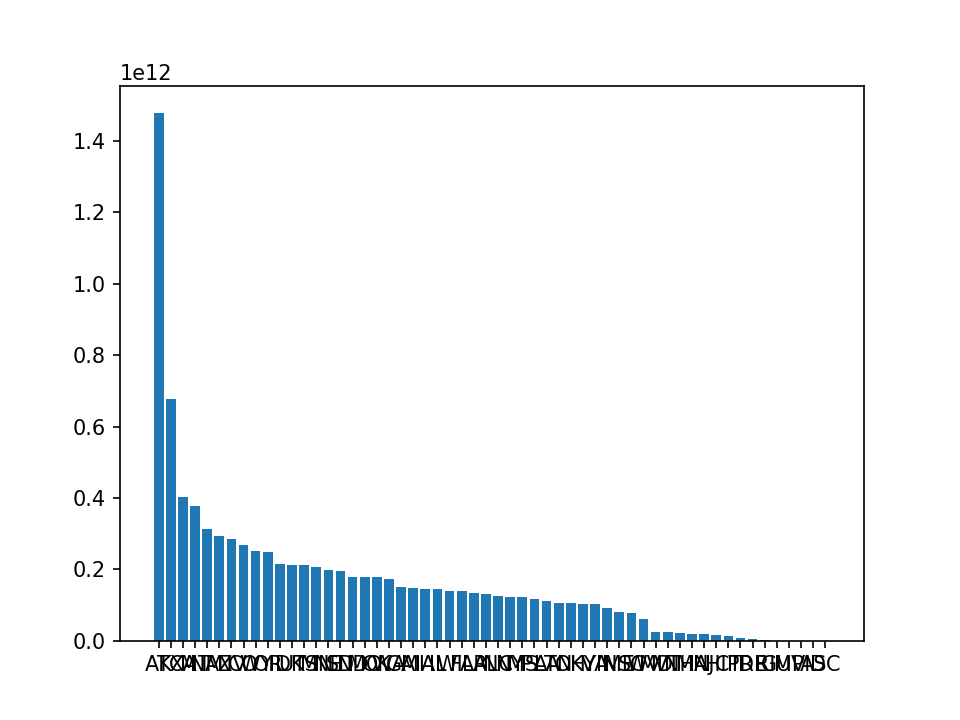

In [15]:
plt.bar(names, areas)
plt.show()

#### Discriptive statistics of a column

For example, we can calcualte the total land area of all states:

In [16]:
states = ee.FeatureCollection('TIGER/2018/States')
area_m2 = states.aggregate_sum("ALAND").getInfo()
area_km2 = area_m2 / 1000000
print("Total land area: ", area_km2, " km2")

Total land area:  9159859.051207  km2


In [17]:
states = ee.FeatureCollection('TIGER/2018/States')
stats = states.aggregate_stats("ALAND").getInfo()
print(stats)

{'max': 1478839695958, 'mean': 163568911628.69644, 'min': 158340391, 'sample_sd': 217378106661.36972, 'sample_var': 4.7253241255681835e+22, 'sum': 9159859051207, 'sum_sq': 4.0971964447406937e+24, 'total_count': 56, 'total_sd': 215428487847.16492, 'total_var': 4.640943337611609e+22, 'valid_count': 56, 'weight_sum': 56, 'weighted_sum': 9159859051207}


#### Add a new column to the attribute table

In [18]:
states = ee.FeatureCollection('TIGER/2018/States').sort('ALAND', False)
states = states.map(lambda x: x.set('AreaKm2', x.area().divide(1000000).toLong()))
first = states.first().toDictionary().getInfo()
print(first)

{'ALAND': 1478839695958, 'AWATER': 245481577452, 'AreaKm2': 1713742, 'DIVISION': '9', 'FUNCSTAT': 'A', 'GEOID': '02', 'INTPTLAT': '+63.3473560', 'INTPTLON': '-152.8397334', 'LSAD': '00', 'MTFCC': 'G4000', 'NAME': 'Alaska', 'REGION': '4', 'STATEFP': '02', 'STATENS': '01785533', 'STUSPS': 'AK'}


#### Set symbology based on column  values

In [19]:
Map = geemap.Map(center=[40, -100], zoom=4)

states = ee.FeatureCollection('TIGER/2018/States')

visParams = {
  'palette': ['purple', 'blue', 'green', 'yellow', 'orange', 'red'],
  'min': 500000000.0,
  'max': 5e+11,
  'opacity': 0.8,
}

image = ee.Image().float().paint(states, 'ALAND')
Map.addLayer(image, visParams, 'TIGER/2018/States')

Map.addLayerControl()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

#### Download attribute table as a CSV

In [ ]:
states = ee.FeatureCollection('TIGER/2018/States')
url = states.getDownloadURL(filetype="csv", selectors=['NAME', 'ALAND', 'REGION', 'STATEFP', 'STUSPS'], filename="states")
print(url)

#### Formatting the output

In [ ]:
first = states.first()
props = first.propertyNames().getInfo()
print(props)
props = states.first().toDictionary(props).getInfo()
print(props)

for key, value in props.items():
    print("{}: {}".format(key, value))

#### Download data as shapefile to Google Drive

In [ ]:
# function for converting GeometryCollection to Polygon/MultiPolygon
def filter_polygons(ftr):
    geometries = ftr.geometry().geometries()
    geometries = geometries.map(lambda geo: ee.Feature( ee.Geometry(geo)).set('geoType',  ee.Geometry(geo).type()))

    polygons = ee.FeatureCollection(geometries).filter(ee.Filter.eq('geoType', 'Polygon')).geometry()
    return ee.Feature(polygons).copyProperties(ftr)

states = ee.FeatureCollection('TIGER/2018/States')
new_states = states.map(filter_polygons)

col_names = states.first().propertyNames().getInfo()
print("Column names: ", col_names)

url = new_states.getDownloadURL("shp", col_names, 'states');
print(url)

desc = 'states'

# Set configration parameters for output vector
task_config = {
    'folder': 'gee-data', # output Google Drive folder
    'fileFormat': 'SHP',  
    'selectors': col_names # a list of properties/attributes to be exported
    }

print('Exporting {}'.format(desc))
task = ee.batch.Export.table.toDrive(new_states, desc, **task_config)
task.start()

## TIGER: US Census Blocks

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Blocks

![](https://i.imgur.com/KTQqb8v.png)

In [20]:
Map = geemap.Map(center=[40, -100], zoom=4)

dataset = ee.FeatureCollection('TIGER/2010/Blocks') \
    .filter(ee.Filter.eq('statefp10', '47'))
    
pop = dataset.aggregate_sum('pop10')
    
print("The number of census blocks: ", dataset.size().getInfo())
print("Total population: ", pop.getInfo())
    
Map.setCenter(-86.79, 35.87, 6)   
Map.addLayer(dataset, {}, "Census Block", False)
    
visParams = {
  'min': 0.0,
  'max': 700.0,
  'palette': ['black', 'brown', 'yellow', 'orange', 'red']
}

image = ee.Image().float().paint(dataset, 'pop10')

Map.setCenter(-73.99172, 40.74101, 13)
Map.addLayer(image, visParams, 'TIGER/2010/Blocks')

Map.addLayerControl()
Map

The number of census blocks:  240116
Total population:  6346105


Map(center=[40.74101, -73.99172], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleBu…

## TIGER: US Census Counties 2018

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2018_Counties

![](https://i.imgur.com/K3j99eA.png)

In [21]:
Map = geemap.Map(center=[40, -100], zoom=4)

Map.setCenter(-110, 40, 5)
states = ee.FeatureCollection('TIGER/2018/States') 
#     .filter(ee.Filter.eq('STUSPS', 'TN'))
# // Turn the strings into numbers
states = states.map(lambda f: f.set('STATEFP', ee.Number.parse(f.get('STATEFP'))))

state_image = ee.Image().float().paint(states, 'STATEFP')

visParams = {
  'palette': ['purple', 'blue', 'green', 'yellow', 'orange', 'red'],
  'min': 0,
  'max': 50,
  'opacity': 0.8,
};

counties = ee.FeatureCollection('TIGER/2016/Counties')  
# print(counties.first().propertyNames().getInfo())

image = ee.Image().paint(states, 0, 2)
# Map.setCenter(-99.844, 37.649, 4)
# Map.addLayer(image, {'palette': 'FF0000'}, 'TIGER/2018/States')
Map.addLayer(state_image, visParams, 'TIGER/2016/States');
Map.addLayer(ee.Image().paint(counties, 0, 1), {}, 'TIGER/2016/Counties')

Map.addLayerControl()
Map

Map(center=[40, -110], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

## TIGER: US Census Tracts

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2010_Tracts_DP1

http://magic.lib.uconn.edu/magic_2/vector/37800/demogprofilehousect_37800_0000_2010_s100_census_1_t.htm

![](https://i.imgur.com/WV2XA9b.png)

In [22]:
Map = geemap.Map(center=[40, -100], zoom=4)

dataset = ee.FeatureCollection('TIGER/2010/Tracts_DP1')
visParams = {
  'min': 0,
  'max': 4000,
  'opacity': 0.8,
   'palette': ['#ece7f2', '#d0d1e6', '#a6bddb', '#74a9cf', '#3690c0', '#0570b0', '#045a8d', '#023858']
}

# print(dataset.first().propertyNames().getInfo())

# Turn the strings into numbers
dataset = dataset.map(lambda f: f.set('shape_area', ee.Number.parse(f.get('dp0010001'))))

# Map.setCenter(-103.882, 43.036, 8)
image = ee.Image().float().paint(dataset, 'dp0010001')

Map.addLayer(image, visParams, 'TIGER/2010/Tracts_DP1')

Map.addLayerControl()
Map

Map(center=[40, -100], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButton(value=…

## TIGER: US Census Roads

https://developers.google.com/earth-engine/datasets/catalog/TIGER_2016_Roads

![](https://i.imgur.com/mguD0IQ.png)

In [23]:
Map = geemap.Map(center=[40, -100], zoom=4)

fc = ee.FeatureCollection('TIGER/2016/Roads')
Map.setCenter(-73.9596, 40.7688, 12)
Map.addLayer(fc, {}, 'Census roads')

Map.addLayerControl()
Map

Map(center=[40.7688, -73.9596], controls=(WidgetControl(options=['position'], widget=HBox(children=(ToggleButt…